In [2]:
import numpy as np
from scipy import division

In [3]:
x = np.arange(6)
x

array([0, 1, 2, 3, 4, 5])

In [16]:
print(x.shape)
print(x.reshape(1,6))
print(x.reshape(1,6).shape)
print(x.reshape(1,1,6))
print(x.reshape(1,1,6).shape)
#print(x.reshape(1,2,6)) #NG
print(np.hstack((x,x)))
print(np.hstack((x,x)).shape)
print(np.vstack((x,x)).shape)

(6,)
[[0 1 2 3 4 5]]
(1, 6)
[[[0 1 2 3 4 5]]]
(1, 1, 6)
[0 1 2 3 4 5 0 1 2 3 4 5]
(12,)
(2, 6)


In [11]:
a = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
b = np.array([[0],[0],[0],[0]])
print(a.shape, b.shape)
c = np.hstack((b,a))
print(c)
print(c.shape)

(4, 3) (4, 1)
[[ 0  1  2  3]
 [ 0  4  5  6]
 [ 0  7  8  9]
 [ 0 10 11 12]]
(4, 4)


In [36]:
np.reshape(np.arange(6), (2, 3))

array([[0, 1, 2],
       [3, 4, 5]])

In [37]:
x = np.array(1)
x

array(1)

In [38]:
#ロジステック関数
x = np.arange(6)
def logistic(z): 
    return 1 / (1 + np.exp(-z))
t = logistic(x)
print(x)
print(t)

[0 1 2 3 4 5]
[ 0.5         0.73105858  0.88079708  0.95257413  0.98201379  0.99330715]


In [39]:
#(t*log(y))+((1-t)*log(1-y))
def loss_function(y, t):
    return - np.sum(np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))
loss_function(np.square(randn(6)), np.square(randn(6)))
print(np.square(randn(6)))

[ 0.09577301  7.99186875  0.94539471  1.06554432  1.95561951  3.46346367]


/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


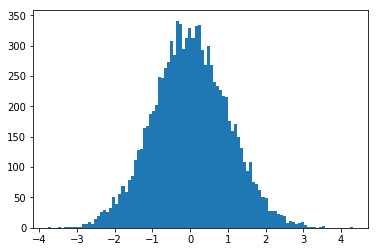

[-0.37752249 -0.12468748 -1.12626436  0.92074186 -1.64822491 -0.18855623]


In [40]:
from numpy.random import *
import matplotlib.pyplot as plt

r = randn(10000)        # 標準正規分布で乱数を1万個生成
plt.hist(r, bins=100)   # 100本のヒストグラムを作成
plt.show()              # グラフを表示
print(randn(6))

In [64]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
from scipy.spatial.distance import cdist
a = np.array([[1,1,1,1],[2,2,2,2]])
b = np.array([[1,2,3,4],[1,1,1,1],[1,2,1,9]])
#ユーグリッド距離
print(np.sqrt((np.square(a[:,np.newaxis]-b).sum(axis=2))))
print(cdist(a,b, 'euclidean'))
#ミンコフスキー距離 p153
print(cdist(a, b, 'minkowski', p=2))
#マンハッタン距離
print(cdist(a, b, 'cityblock'))
#マハラノビス距離p47　　ユーグリッド距離を共分散行列で割り算。分布の広がりを考慮した距離。
print(cdist(a, b, 'mahalanobis', VI=None))
#コサイン距離
print(cdist(a,b, 'cosine'))
#ハミング距離
print(cdist(a, b, 'hamming'))
#チェビシェフ距離
print(cdist(a, b, 'chebyshev'))
#キャンベラ距離
print(cdist(a, b, 'canberra'))

[[ 3.74165739  0.          8.06225775]
 [ 2.44948974  2.          7.14142843]]
[[ 3.74165739  0.          8.06225775]
 [ 2.44948974  2.          7.14142843]]
[[ 3.74165739  0.          8.06225775]
 [ 2.44948974  2.          7.14142843]]
[[ 6.  0.  9.]
 [ 4.  4.  9.]]
[[ 5.65685425  0.          0.        ]
 [        nan         nan         nan]]
[[ 0.08712907  0.          0.30312685]
 [ 0.08712907  0.          0.30312685]]
[[ 0.75  0.    0.5 ]
 [ 0.75  1.    0.75]]
[[ 3.  0.  8.]
 [ 2.  1.  7.]]
[[ 1.43333333  0.          1.13333333]
 [ 0.86666667  1.33333333  1.3030303 ]]


In [65]:
#https://github.com/jonesgithub/book-1/blob/master/ML%20Machine%20Learning-A%20Probabilistic%20Perspective.pdf
import numpy as np
#Kullback–Leibler divergence
def kld(p, q):
    """Calculates Kullback–Leibler divergence"""
    p = np.array(p)
    q = np.array(q)
    return np.sum(p * np.log(p / q), axis=(p.ndim - 1))
 
def jsd(p, q):
    """Calculates Jensen-Shannon Divergence"""
    p = np.array(p)
    q = np.array(q)
    m = 0.5 * (p + q)
    return 0.5 * kld(p, m) + 0.5 * kld(q, m)

print(kld(np.square(randn(6)), np.square(randn(6))))
print(jsd(np.square(randn(6)), np.square(randn(6))))

1.45655642668
1.14098203716
